# WeatherPy
----

### Analysis

* As expected, the weather gets warmer as the degrees latitude gets closer to the equator (0 degrees).  However, the highest temperatures are not found at the equator (based on the random cities populated).  The highest temperatures are found at closer to -20 degrees latitude (southern hemisphere).  The lowest max temperature in the southern hemisphere at this time is at around 40(F) where as in the northern hemisphere, the temperatures reach below -40(F). There is much colder temperatures in the northern hemisphere this time of year based on the tilt of the earth.

* There is no strong relationship between latitude and cloudiness compared to the latitude. There is however, a noticeable line at the 100% humidity mark as you go all the way from one end of the latitude spectrum to the other.  The same can be said for the cloudiness data.  There is a noticeable line at 0 cloudiness, ~75, and 90 percent marks.  

* For the most part, there is no strong relationship between latitude and wind speed. However, at the equator, the wind speed doesn't get over 20mph.  When you go out to -40 latitude and beyond as well as 40 and beyond latitude, there are some outliers, and higher wind speeds found.  The southern hemisphere has a few cities with wind speeds around 30mph.  The northern hemisphere shows some extreme outliers with a city wind speed of ~43mph and >60mph


In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

647


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
url = " http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url_query = f"{url}appid={api_key}&units={units}&q="

city_data = []
row_count = 1

print("Beginning Data Retrieval")
print("-------------------------------")

for city in cities:
    try:
        response = requests.get(url_query + city).json()
        city_temp_max = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_cloudiness = response['clouds']['all']
        city_country = response['sys']['country']
        city_date = response['dt']
        city_wind_speed = response['wind']['speed']
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city = city
        print("Processing Record", row_count, "| " + city)
        row_count +=1
        city_data.append({
            "Max Temp": city_temp_max,
            "Humidity": city_humidity,
            "Cloudiness": city_cloudiness,
            "Country": city_country,
            "Date": city_date,
            "Wind Speed": city_wind_speed,
            "Latitude": city_lat,
            "Longtitude": city_lon,
            "City": city
        })
    except:
        print('City not found. Skipping...')


Beginning Data Retrieval
-------------------------------
Processing Record 1 | ilulissat
Processing Record 2 | warmbad
Processing Record 3 | tuatapere
Processing Record 4 | avallon
Processing Record 5 | maceio
Processing Record 6 | hermanus
Processing Record 7 | nouadhibou
Processing Record 8 | arraial do cabo
Processing Record 9 | bredasdorp
Processing Record 10 | benguela
Processing Record 11 | talnakh
Processing Record 12 | awjilah
Processing Record 13 | poum
Processing Record 14 | upernavik
City not found. Skipping...
Processing Record 15 | victoria
Processing Record 16 | rikitea
Processing Record 17 | rancho cucamonga
Processing Record 18 | san cristobal
Processing Record 19 | kodiak
Processing Record 20 | yellowknife
Processing Record 21 | torbay
Processing Record 22 | sinnamary
City not found. Skipping...
Processing Record 23 | luanda
City not found. Skipping...
Processing Record 24 | narsaq
Processing Record 25 | port elizabeth
Processing Record 26 | puerto ayora
Processing Rec

City not found. Skipping...
Processing Record 230 | uspenka
Processing Record 231 | valparaiso
Processing Record 232 | termiz
Processing Record 233 | tura
Processing Record 234 | huancavelica
Processing Record 235 | mincivan
Processing Record 236 | berlevag
Processing Record 237 | elk city
Processing Record 238 | tual
Processing Record 239 | omboue
Processing Record 240 | mahon
Processing Record 241 | aksarka
Processing Record 242 | cayenne
Processing Record 243 | naze
Processing Record 244 | evensk
Processing Record 245 | suleja
Processing Record 246 | ayagoz
Processing Record 247 | conceicao do mato dentro
Processing Record 248 | margate
Processing Record 249 | cherskiy
City not found. Skipping...
Processing Record 250 | lompoc
City not found. Skipping...
Processing Record 251 | champasak
City not found. Skipping...
Processing Record 252 | vardo
Processing Record 253 | kloulklubed
Processing Record 254 | iqaluit
Processing Record 255 | merauke
Processing Record 256 | dibai
Processing

City not found. Skipping...
Processing Record 458 | benjamin aceval
Processing Record 459 | port macquarie
Processing Record 460 | carora
Processing Record 461 | road town
Processing Record 462 | coquimbo
Processing Record 463 | yadrin
Processing Record 464 | banda aceh
Processing Record 465 | awbari
Processing Record 466 | khabary
Processing Record 467 | vila franca do campo
Processing Record 468 | manavalakurichi
Processing Record 469 | toora-khem
Processing Record 470 | edmundston
Processing Record 471 | nelson bay
Processing Record 472 | alyangula
Processing Record 473 | boyuibe
Processing Record 474 | pasil
Processing Record 475 | los lunas
Processing Record 476 | kieta
Processing Record 477 | sarkand
Processing Record 478 | movileni
Processing Record 479 | selfoss
City not found. Skipping...
Processing Record 480 | lavrentiya
Processing Record 481 | palana
Processing Record 482 | trincomalee
Processing Record 483 | dogbo
Processing Record 484 | lazaro cardenas
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
city_df.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Latitude      585
Longtitude    585
Max Temp      585
Wind Speed    585
dtype: int64

In [67]:
city_df.to_csv("weather_data.csv")

city_df = pd.DataFrame(city_data)
city_df
city_df.head()



,City,Cloudiness,Country,Date,Humidity,Latitude,Longtitude,Max Temp,Wind Speed
0,ilulissat,0,GL,1547257800,43,69.22,-51.10,-7.61,1.12
1,warmbad,92,DE,1547259600,80,50.67,13.08,39.20,11.41
2,tuatapere,0,NZ,1547259375,73,-46.13,167.69,62.93,5.06
3,avallon,92,FR,1547260768,97,47.49,3.91,34.45,5.39
4,maceio,0,BR,1547258400,73,-9.67,-35.74,77.00,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

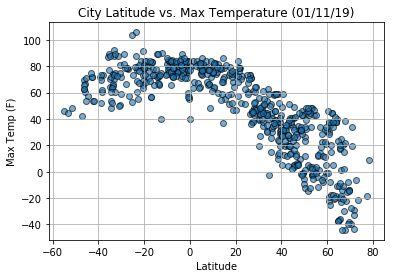

In [58]:
plt.scatter(city_df["Latitude"], city_df["Max Temp"], marker="o",edgecolor = 'black', linewidth=1,alpha =.6)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (01/11/19)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsMaxTemp.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

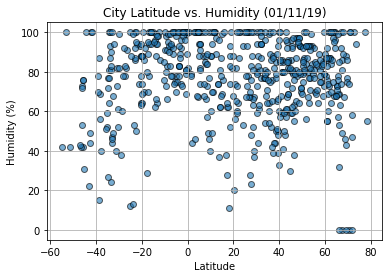

In [59]:
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker="o",edgecolor = 'black', linewidth=1,alpha =.6)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (01/11/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

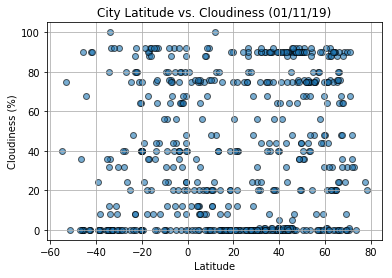

In [60]:
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker="o",edgecolor = 'black', linewidth=1,alpha =.6)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/11/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

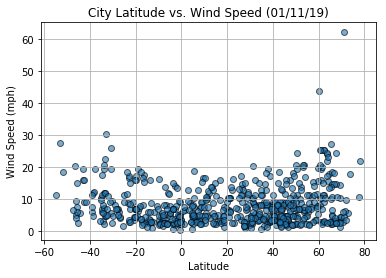

In [61]:
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker="o",edgecolor = 'black', linewidth=1,alpha =.6)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/11/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsWindSpeed.png")

# Show plot
plt.show()